# 2018 Hackathon Udacity Data Powered by Bertelsman

## Table of Contents
- [Introduction](#intro)
- [Source System 1: Internet services penetration to global](#source1)
- [Source System 2: Adult moltarity](#source2)
- [Join between the Adult mortaliry and Internet servces](#join)
- [Visualization the Adult mortaliry rate and Internet servces](#Viz)
- [References](#Ref)

<a id='intro'></a>
# Introduction

The project used 2 data sources to find some trends and insights to prove our hypothesis for Hackathon Udacity Data Science Scholarship Powered by Bertelsmann 4-5 August 2018

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as p
import numpy as np
%matplotlib inline

import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 8, 10

<a id='source1'></a>
# Source System 1: Internet services penetration to global

The data link https://ourworldindata.org/internet and I choose "I.2 World map of internet access data".
The data source shares of individuals using the internet, measured as the percentage of the population. Internet users are individuals whohave used the Internet (from any location). The Internet can be used via a computer, mobile phone,personal digital assistant, games machine, digital TV etc.

In [20]:
net_ser = pd.read_csv('../share-of-individuals-using-the-internet.csv')
net_ser.columns = ['Entity_country', 'Code','Net_Year','Internet_val']

In [21]:
net = net_ser[['Entity_country','Net_Year','Internet_val']][(net_ser['Net_Year'] > 1999)].dropna()

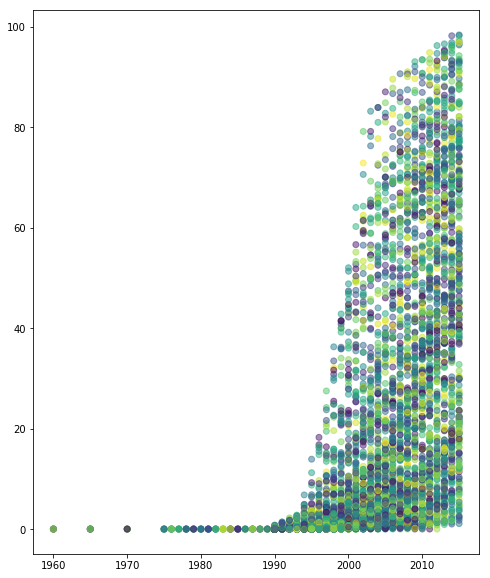

In [42]:
colr = np.random.rand(5721)
plt.scatter(net_ser['Net_Year'],net_ser['Internet_val'],c=colr,alpha=0.5)
plt.show()

<a id='source2'></a>
# Source System 2: Adult moltarity

** This is the link for the data http://apps.who.int/gho/data/node.main.11?lang=en **

The Data Describes the following in this link http://apps.who.int/gho/data/node.wrapper.imr?x-id=64:


### Rationale:


Disease burden from non-communicable diseases among adults - the most economically productive age span - is rapidly increasing in developing countries due to ageing and health transitions. Therefore, the level of adult mortality is becoming an important indicator for the comprehensive assessment of the mortality pattern in a population.

### Definition:


Probability that a 15 year old person will die before reaching his/her 60th birthday. The probability of dying between the ages of 15 and 60 years (per 1 000 population) per year among a hypothetical cohort of 100 000 people that would experience the age-specific mortality rate of the reporting year.


### Associated terms:


Life table : A set of tabulations that describe the probability of dying, the death rate and the number of survivors for each age or age group. Accordingly, life expectancy at birth and adult mortality rates are outputs of a life table.


### Method of measurement:


Civil or sample registration: Mortality by age and sex are used to calculate age specific rates. Census: Mortality by age and sex tabulated from questions on recent deaths that occurred in the household during a given period preceding the census (usually 12 months). Census or surveys: Direct or indirect methods provide adult mortality rates based on information on survival of parents or siblings.


### Method of estimation:


Adult mortality rates are derived from life tables which draw on UN World Population Prospects revision, recent and unpublished analyses of all-cause and HIV mortality for countries with high HIV prevalence, vital registration data, and estimates of child mortality from UN Inter-agency Group for Child Mortality Estimation. 


### Method of estimation of global and regional aggregates:

The numbers of deaths estimated from life table and population by age groups are aggregated by relevant region in order to compute age specific mortality rates, then the adult mortality rate.


In [24]:
Adult_mortality = pd.read_csv('../Adult mortality.csv')
Adult_mortality.head(2)
Female = Adult_mortality[Adult_mortality['Sex'].str.contains("Female")]

In [25]:
F = Female[['Year','Country','Display Value']][(Female['Year'] > 1999) & (Female['Year'] < 2016)].dropna()

In [26]:
F['Year'].unique()

array([2015, 2004, 2003, 2009, 2008, 2001, 2002, 2006, 2000, 2007, 2005,
       2014, 2013, 2011, 2010, 2012], dtype=int64)

In [44]:
F.head(2)

,Year,Country,Display Value
1,2015,Afghanistan,210
8,2004,Afghanistan,263


In [46]:
net.head(2)

,Entity_country,Net_Year,Internet_val
1,Afghanistan,2001,0.004723
2,Afghanistan,2002,0.004561


<a id='join'></a>
## Join between the Adult mortaliry and Internet servces

In [28]:
df = pd.merge(F, net, how='inner', left_on=['Year','Country'], right_on=['Net_Year','Entity_country'])

In [29]:
# df[df['Country'] == 2015]
df[df['Country'].str.contains('India|Egypt|Bolivia|Germany')].head(2)

,Year,Country,Display Value,Entity_country,Net_Year,Internet_val
675,2000,Egypt,125,Egypt,2000,0.641265
676,2015,Egypt,124,Egypt,2015,37.819383


<a id='Viz'></a>
## Visualization the Adult mortaliry rate and Internet servces

The Adult Females Mortality Rate

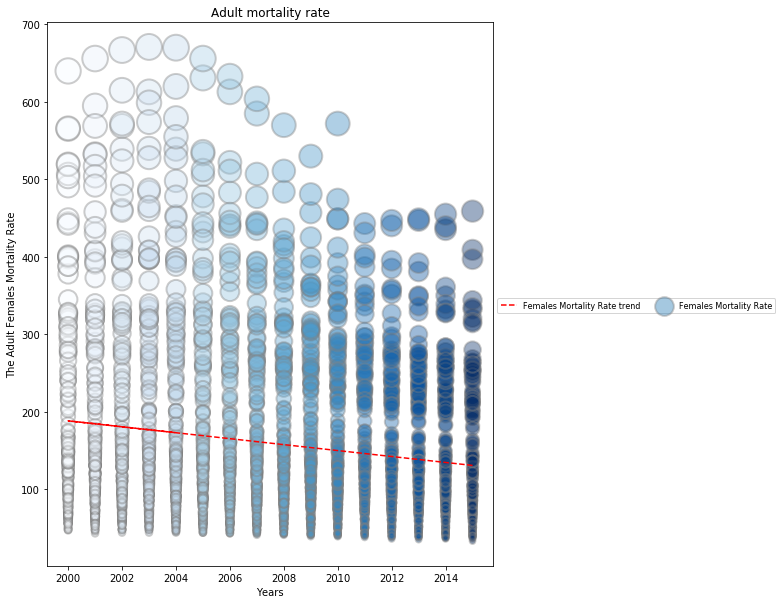

In [32]:
plt.scatter(x= df['Year'],y = df['Display Value'], s=df['Display Value'], c=df['Year'], cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

# Add titles (main and on axis)
plt.xlabel("Years")
plt.ylabel("The Adult Females Mortality Rate")
plt.title("Adult mortality rate")

z = np.polyfit(df['Year'], df['Display Value'], 1)
p = np.poly1d(z)
plt.plot(df['Year'],p(df['Year']),"r--")

plt.legend(
           ('Females Mortality Rate trend','Females Mortality Rate'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8,
           bbox_to_anchor=(1, 0.5))
 
plt.show()

The Interenet services usage accross the years

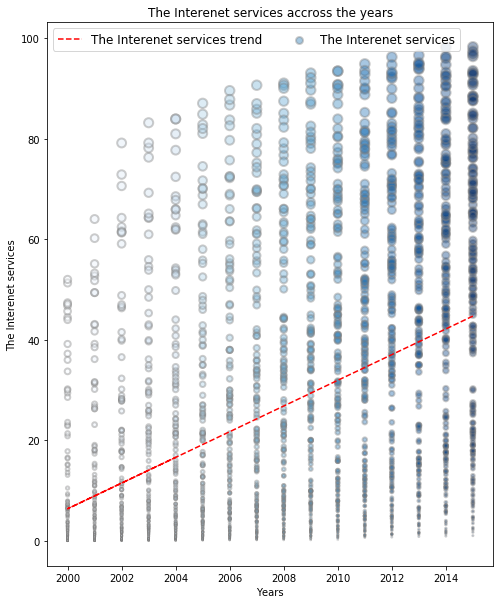

In [41]:
plt.scatter(x= df['Year'],y = df['Internet_val'], s=df['Internet_val'], c=df['Year'], cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

# Add titles (main and on axis)
plt.xlabel("Years")
plt.ylabel("The Interenet services")
plt.title("The Interenet services accross the years")

z = np.polyfit(df['Year'], df['Internet_val'], 1)
p = np.poly1d(z)
plt.plot(df['Year'],p(df['Year']),"r--")

plt.legend(
           ('The Interenet services trend','The Interenet services'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=12)
 
plt.show()

Adult Females Mortality Rate vs The Increases in Internet Services

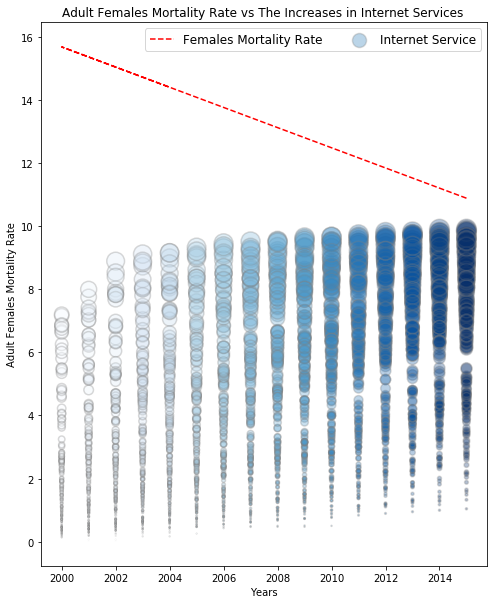

In [37]:
plt.scatter(x= df['Year'],y = df['Internet_val']**0.5, s=df['Internet_val']*4,c=df['Year'] , cmap="Blues", alpha=0.3, edgecolors="grey", linewidth=1.5)

# Add titles (main and on axis)
plt.xlabel("Years")
plt.ylabel("Adult Females Mortality Rate")
plt.title("Adult Females Mortality Rate vs The Increases in Internet Services ")

z = np.polyfit(df['Year'], df['Display Value'], 1)
p = np.poly1d(z)
plt.plot(df['Year'],p(df['Year'])/12,"r--")

plt.legend(
           ('Females Mortality Rate','Internet Service'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)
 
plt.show()

Adult Females Mortality Rate vs The Increases in Internet Services

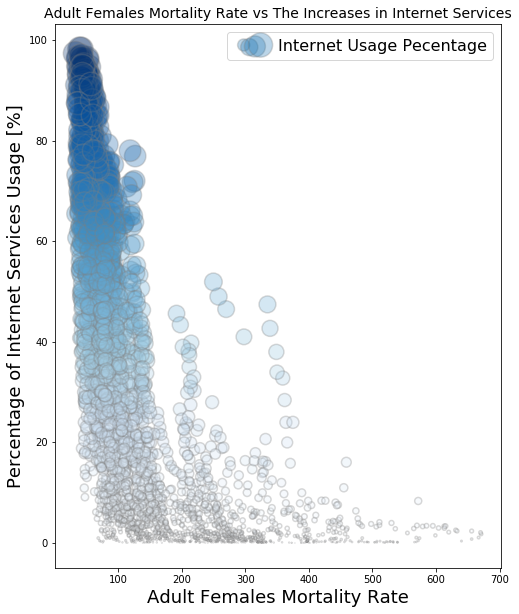

In [38]:
plt.scatter(x= df['Display Value'],y = df['Internet_val'], s=df['Internet_val']*6,c=df['Internet_val'] , cmap="Blues", alpha=0.3, edgecolors="grey", linewidth=1.5)

# Add titles (main and on axis)
plt.xlabel("Adult Females Mortality Rate",fontsize=18)
plt.ylabel("Percentage of Internet Services Usage [%]",fontsize=18)
plt.title("Adult Females Mortality Rate vs The Increases in Internet Services",fontsize=14)

plt.legend(
    ('Internet Usage Pecentage','Internet Service'),
           scatterpoints=5,
           loc='upper right',
           ncol=5,
        fontsize=16)
 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


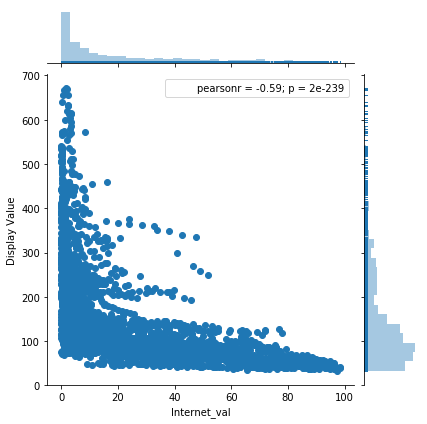

In [40]:
sns.jointplot(x=df["Internet_val"], y=df["Display Value"], kind='scatter', marginal_kws=dict(bins=30, rug=True))

<a id='Ref'></a>
# References

* https://ourworldindata.org/internet
* http://apps.who.int/gho/data/node.main.11?lang=en